In [230]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
import matplotlib.pyplot as pl
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [231]:
data=pd.read_csv('GrammarandProductReviews.csv')

In [232]:
data.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
3            K-Y Love Sensuality Pleasure Gel  ...  113026909.0   
4            K-Y Love Sensuality Pleasure Gel  ...  171267657.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN              1   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   
3   https://www.walmart.com/reviews/product/43383370   
4   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[5 rows x 25 columns]

In [233]:
data.shape

(71044, 25)

In [234]:
data.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [235]:
data.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [236]:
data=data.dropna(subset=['reviews.text'])
data1=data.copy()

In [237]:
data.shape

(71008, 25)

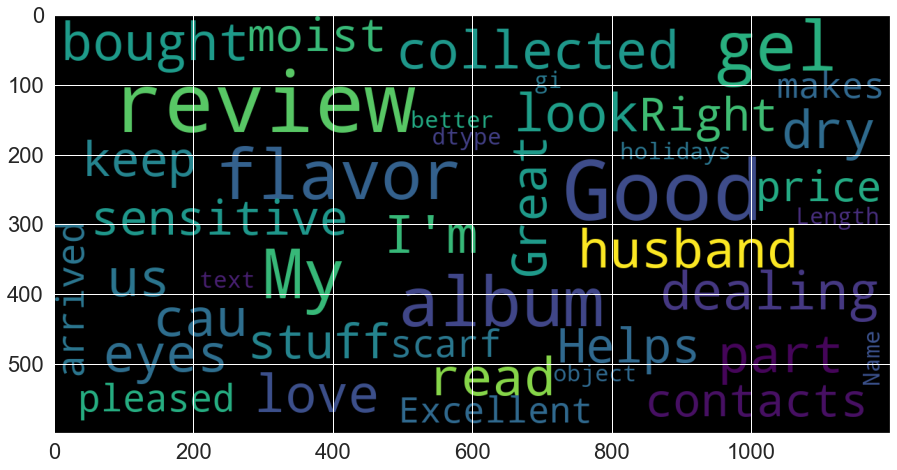

In [238]:
def showWordcloud(data):
    wordcloud=WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        max_font_size=40,
                        scale=3,
                        random_state=None
                        ).generate(str(data))
    
    
    pl.figure(figsize=(15,10))
    pl.imshow(wordcloud)
    pl.show()
    return wordcloud
    
showWordcloud(data['reviews.text'])

<IPython.core.display.Javascript object>

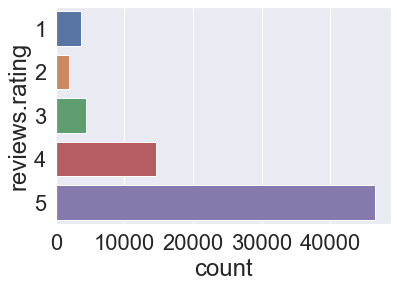

In [239]:
sns.countplot(y=data['reviews.rating'])

In [240]:
ratings=data['reviews.rating'].value_counts().reset_index().copy()
ratings.columns=['Ratings','Counts']

ratings

Ratings  Counts
0        5   46516
1        4   14592
2        3    4367
3        1    3701
4        2    1832

In [241]:
trace=go.Bar(x=ratings['Counts'],y=ratings['Ratings'],orientation='h',
            marker=dict(color=ratings['Counts'])
            )
layout=go.Layout(dict(title='Ratings Plot'))
data=[trace]
fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

In [242]:
data1['review_len']=data1['reviews.text'].apply(len)

In [243]:
data1.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   

                                         name  ... reviews.numHelpful  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...                0.0   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...                NaN   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...                NaN   

  reviews.rating                                 reviews.sourceURLs  \
0              5  https://redsky.target.com/groot-domain-api/v1/...   
1              5   https://www.walmart.com/reviews/product/29775278   
2              5   https://www.walmart.com/reviews/product/29775278   

                                        reviews.text reviews.title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   

   reviews.userCity  reviews.userProvince  reviews.username          upc  \
0       Los Angeles                   NaN            Joshua  6.02537E+11   
1               NaN                   NaN         Dorothy W  73416000391   
2               NaN                   NaN         Dorothy W  73416000391   

  review_len  
0        201  
1         62  
2         12  

[3 rows x 26 columns]

In [244]:
data1['review_len'].describe()

count    71008.000000
mean       208.992001
std        225.449415
min          2.000000
25%         78.000000
50%        136.000000
75%        254.000000
max       5865.000000
Name: review_len, dtype: float64

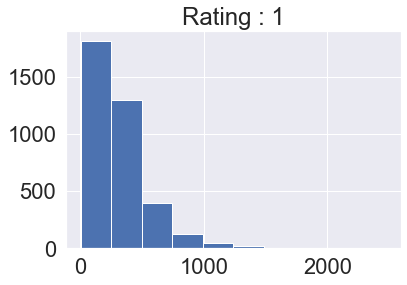

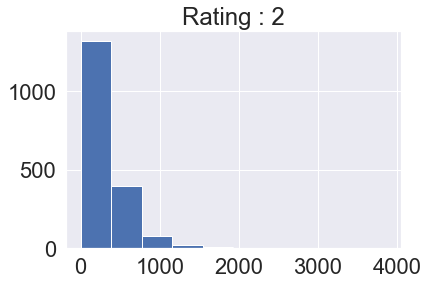

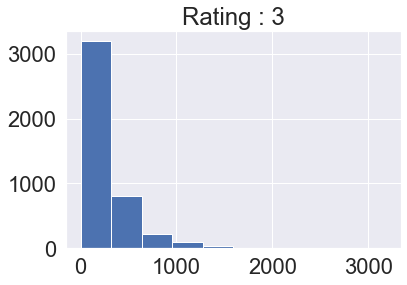

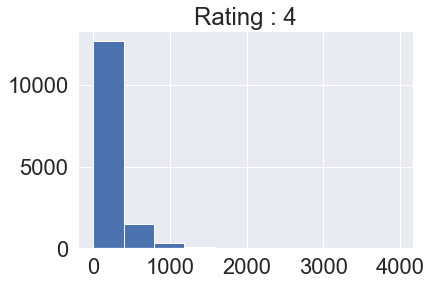

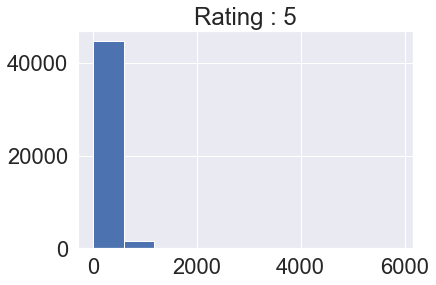

In [245]:
rating=[1,2,3,4,5]
for i in rating:
    temp=data1[data1['reviews.rating']==i]['review_len']
    pl.hist(temp)
    pl.title('Rating : '+str(i))
    pl.show()
    
    

In [246]:
data1.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc',
       'review_len'],
      dtype='object')

<IPython.core.display.Javascript object>

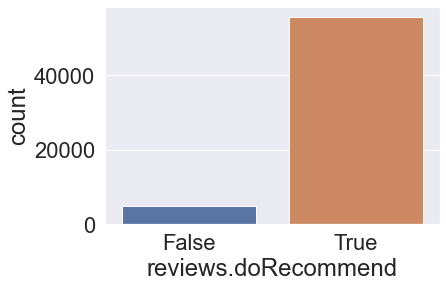

In [247]:
# data1['reviews.doRecommend'][data1['reviews.doRecommend']==]
sns.countplot(data1['reviews.doRecommend'])

In [248]:
data1['reviews.didPurchase'].fillna('Review N/A',inplace=True)

<IPython.core.display.Javascript object>

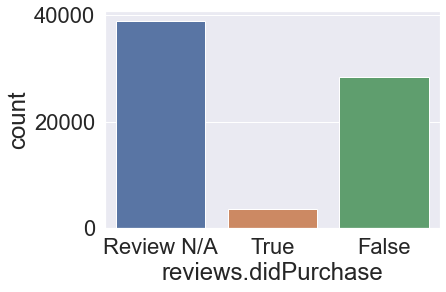

In [249]:
sns.countplot(data1['reviews.didPurchase'])

<IPython.core.display.Javascript object>

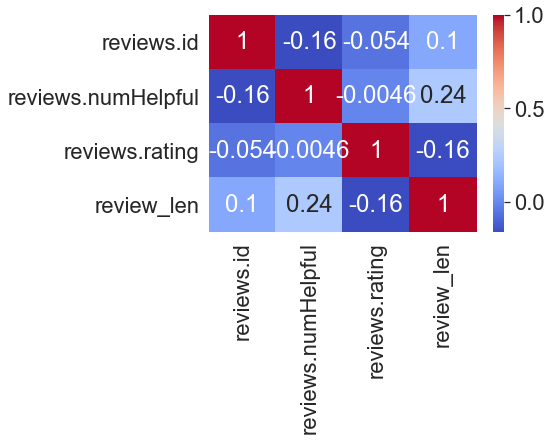

In [254]:
sns.heatmap(data1.corr(),annot=True,cmap='coolwarm')